In [1]:
from qiskit import *
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, compile


from qiskit.tools import visualization
from qiskit.tools.visualization import circuit_drawer, plot_histogram

from math import pi
import matplotlib.pyplot as plt

In [2]:
# Plot results
def show_results(D):
    # D is a dictionary with classical bits as keys and count as value
    # example: D = {'000': 497, '001': 527}
    plt.bar(range(len(D)), list(D.values()), align='center')
    plt.xticks(range(len(D)), list(D.keys()))
    plt.show()

# Execute circuit, display a histogram of the results
def execute_locally(qc, draw_circuit=False):
    # Compile and run the Quantum circuit on a simulator backend
    backend_sim = Aer.get_backend('qasm_simulator')
    job_sim = execute(qc, backend_sim, shots=1000)
    result_sim = job_sim.result()
    result_counts = result_sim.get_counts(qc)
    
    # Print the results
    print("simulation: \n\n", result_counts)
    show_results(result_counts)

In [3]:
def qftransform (circuit, qr, swap = True, n=0):
    if n == 0:
        n=qr.size
    for i in range(n-1, -1, -1):
        circuit.barrier()
        circuit.h(qr[i])
        for j in range (i-1, -1, -1):
            r = 2**(i-j+1)
            circuit.cu1((2*pi/r), qr[j], qr[i])
    circuit.barrier()
    if swap == True and n > 1:
        for i in range(0, n//2):
            circuit.swap(qr[i], qr[n-i-1])
            
def inverse_qftransform (circuit, qr, swap = True, n=0):
    if n == 0:
        n=qr.size
    if swap == True and n > 1:
        for i in range(0, n//2):
            circuit.swap(qr[i], qr[n-i-1])
    for i in range(0, n, 1):
        circuit.barrier()
        for j in range (0, i, 1):
            r = 2**(i-j+1)
            circuit.cu1((-2*pi/r), qr[i], qr[j])
        circuit.h(qr[i])
    circuit.barrier()

In [4]:
def phase_est(qc, qr,qin, theta, phi, lamb, n):
    teta= -(1/2)*1*(2*pi)/(2**n)
    
    for i in range(n):
        qc.h(qr[i])
        for j in range(2**i):
            qc.cu3(teta,-pi/2,pi/2,qr[i],qin[0])
            
    inverse_qftransform(qc,qr,n=n)

In [5]:
def inv_phase_est(qc,qr,qin,theta,phi,lamb,n):
    A = [[1.5,0.5],[0.5,1.5]]
    k = 2
    t0 = 2*pi
    T = 2**n
    teta= A[0][1] * k * t0 / T
    qftransform(qc,qr,n=n)
    for k in range(n):
        for j in range(2**k):
            qc.cu3(teta,-pi/2,pi/2,qr[k],qin[0])
        
    for i in range(n):
        qc.h(qr[i])
    

In [6]:
def cyr_lamb (qc,qr,qanc,r,n):
    teta=pi/16
    u=0
    for k in reversed(range(n)):
            for j in range(2**k):
                qc.cu3(teta,5*pi,3*pi,qr[u],qanc[0])
            u+=1

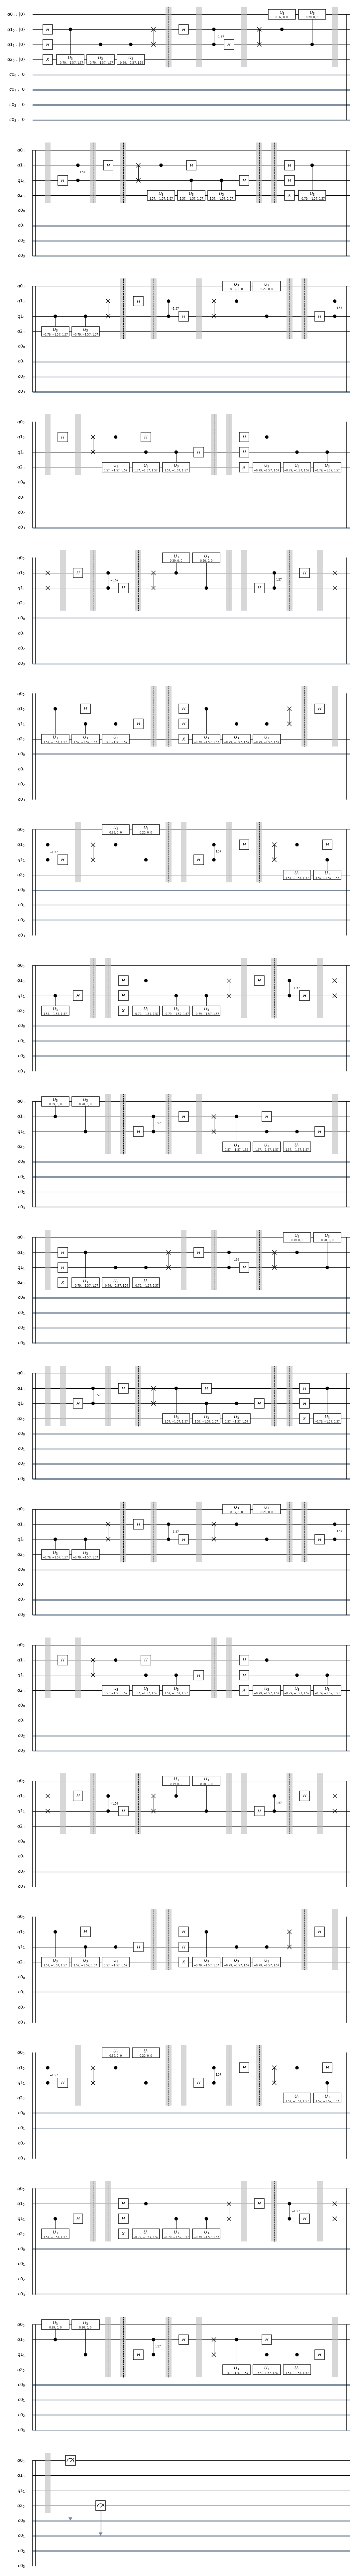

In [7]:
n=2 # registers
z=n-1
m=1 # acillas
k=4 # classical bits
l=1 # input qbits
r=4 # fidelity
qanc = QuantumRegister(m)
qreg = QuantumRegister(n)
qin = QuantumRegister(l)
cb= ClassicalRegister(k)
qc= QuantumCircuit(qanc,qreg,qin,cb)

for i in range(10):
    qc.x(qin)
    phase_est(qc,qreg, qin,m,k,l,n)
    qc.swap(qreg[0],qreg[1])
    #R(lamb)
   # cyr_lamb(qc,qreg,qanc,r,n)
    qc.cu3(pi/8,0,0,qreg[0],qanc[0])
    qc.cu3(pi/16,0,0,qreg[1],qanc[0])

    qc.barrier()
    #R(lamb)


    inv_phase_est(qc,qreg, qin,m,k,l,n)
    qc.barrier()
    qc.barrier()
    
qc.measure(qanc[0],cb[0])
qc.measure(qin[0],cb[1])

qc.draw(output='mpl')

simulation: 

 {'0000': 14, '0011': 591, '0010': 16, '0001': 379}


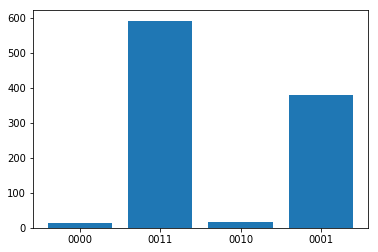

In [66]:
execute_locally(qc)

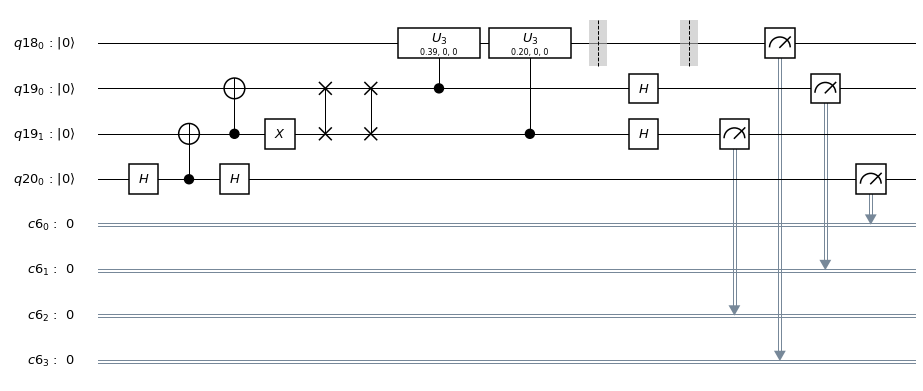

In [34]:
n=2 # registers
z=n-1
m=1 # acillas
k=4 # classical bits
l=1 # input qbits
r=4 # fidelity

qanc = QuantumRegister(m)
qreg = QuantumRegister(n)
qin = QuantumRegister(l)
cb= ClassicalRegister(k)
qc= QuantumCircuit(qanc,qreg,qin,cb)
qc.h(qin)
qc.cx(qin,qreg[1])
qc.cx(qreg[1],qreg[0])
qc.h(qin)
qc.x(qreg[1])
qc.swap(qreg[0],qreg[1])
qc.swap(qreg[0],qreg[1])
#cyr_lamb(qc,qreg,qanc,r,n)
qc.cu3(pi/8,0,0,qreg[0],qanc[0])
qc.cu3(pi/16,0,0,qreg[1],qanc[0])

qc.barrier()
qc.h(qreg)
qc.barrier()
#qc.measure(qin[0],cb[0])

#qc.measure(qreg[0],cb[1])
qc.measure(qanc[0],cb[3])

#qc.measure(qreg[1],cb[2])


qc.draw(output='mpl')

simulation: 

 {'1001': 1, '1110': 5, '0101': 237, '1101': 6, '0011': 263, '0000': 229, '1011': 4, '0110': 245, '1111': 1, '1000': 9}


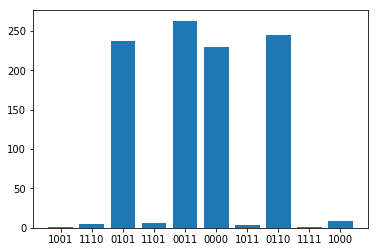

In [35]:
execute_locally(qc)

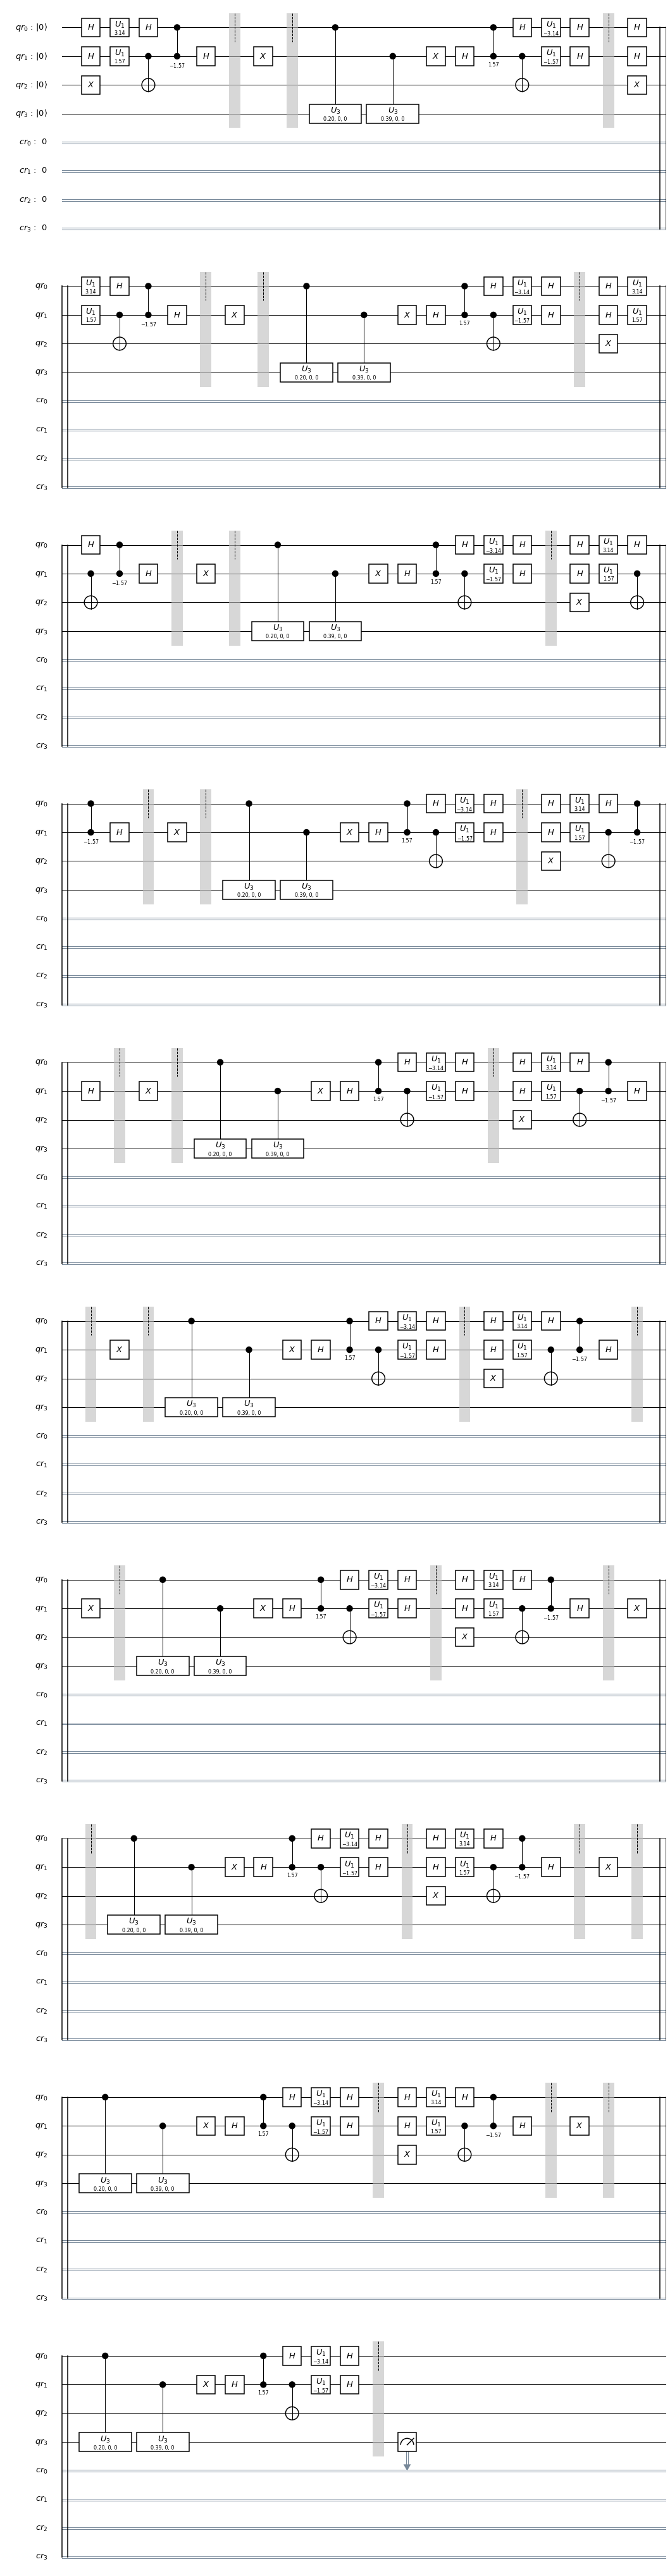

In [22]:

# create Quantum Register called "qr" with 4 qubits
qr = QuantumRegister(4, name="qr")
# create Quantum Register called "cr" with 4 qubits
cr = ClassicalRegister(4, name="cr")
# Creating Quantum Circuit called "qc" involving your Quantum Register "qr"
# and your Classical Register "cr"
qc = QuantumCircuit(qr, cr, name="solve_linear_sys")        
    
# Initialize times that we get the result vector 
n0 = 0
n1 = 0
    
for i in range(10):
    #Set the input|b> state"
    qc.x(qr[2])
        
    #Set the phase estimation circuit
    qc.h(qr[0])
    qc.h(qr[1]) 
    qc.u1(pi, qr[0])
    qc.u1(pi/2, qr[1])
    qc.cx(qr[1], qr[2])
    
    #The quantum inverse  Fourier transform 
    qc.h(qr[0])
    qc.cu1(-pi/2, qr[0], qr[1])
    qc.h(qr[1])
    
    #R（lamda^-1） Rotation
    qc.barrier()
    qc.x(qr[1])
    qc.barrier()
    qc.cu3(pi/16, 0, 0, qr[0], qr[3])
    qc.cu3(pi/8, 0, 0, qr[1], qr[3])   
    
    #Uncomputation
    qc.x(qr[1])
    qc.h(qr[1])
    qc.cu1(pi/2, qr[0], qr[1])
    qc.h(qr[0])
    
    qc.cx(qr[1], qr[2])
    qc.u1(-pi/2, qr[1])
    qc.u1(-pi, qr[0])
    
    qc.h(qr[1]) 
    qc.h(qr[0])
    qc.barrier()
qc.measure(qr[3],cr[0])
qc.draw(output='mpl')

simulation: 

 {'0001': 373, '0000': 627}


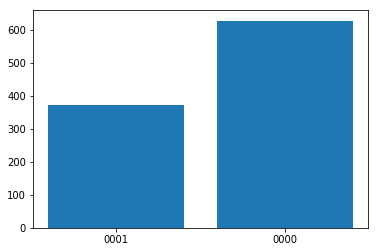

In [23]:
execute_locally(qc)

In [9]:
qiskit.aqua.algorithms.quantum_algorithm.QuantumAlgorithm


AttributeError: module 'qiskit' has no attribute 'aqua'